<a href="https://colab.research.google.com/github/lucasgcb/redes-neurais/blob/main/L%C3%B3gica_Fuzzy_com_Python_O_Guia_para_Iniciantes_Exemplo_das_gorgetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lógica Fuzzy com Python: O Guia para Iniciantes: Exemplo das gorgetas

**Antecedentes (entradas)**

Serviço: que nota você daria para o serviço, em uma escala de 0 a 10?
- ruim, aceitável, ótimo

Qualidade da comida: quão boa estava a comida, em uma escala de 0 a 10?
- ruim, boa, saborosa

**Consequentes (saídas)**

Gorjeta: quanta gorjeta você daria, entre 0% e 20%?
- baixa, média, alta

Regras
- Se a qualidade da comida for *ruim* ou o serviço for *ruim* então a gorjeta será *baixa*
- Se o serviço for *médio* então a gorjeta será *média*
- Se o serviço for *bom* e a qualidade da comida for *saborosa* então a gorjeta será *alta*


# Instalação e importação das bibliotecas

- Documentação: https://pythonhosted.org/scikit-fuzzy/overview.html

In [1]:
!pip install scikit-fuzzy
#!pip install scikit-fuzzy == 0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=9adb66fdee69ad2de8e609d1f86094bcadb9d8bc87416d19fe1398937c94c27a
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedentes e consequente

In [3]:
np.arange(0, 11, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [5]:
qualidade

Antecedent: qualidade

In [6]:
qualidade.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [7]:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

In [8]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Membership functions

In [9]:
qualidade.automf(number = 3, names = ['ruim', 'boa', 'saborosa'])
servico.automf(number = 3, names = ['ruim', 'aceitável', 'ótimo'])

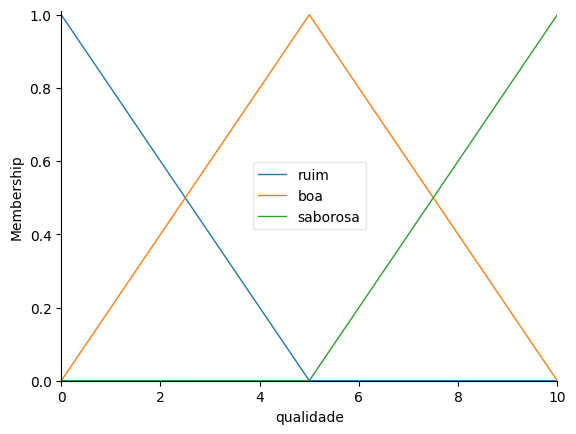

In [10]:
qualidade.view()

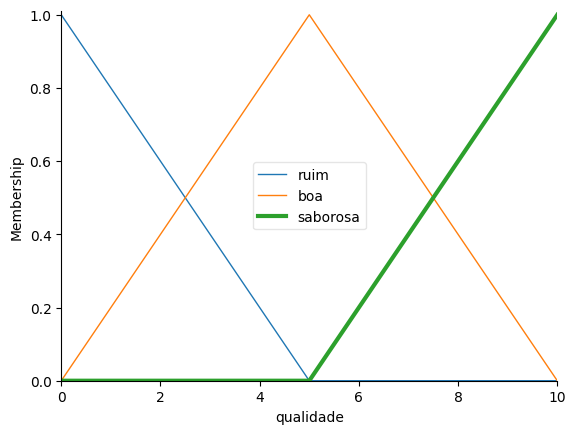

In [11]:
qualidade['saborosa'].view()

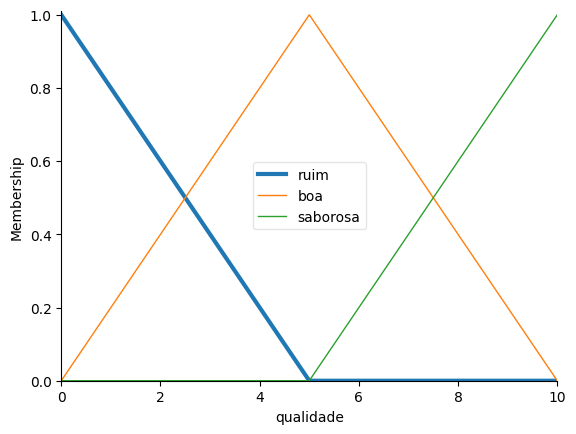

In [12]:
qualidade['ruim'].view()

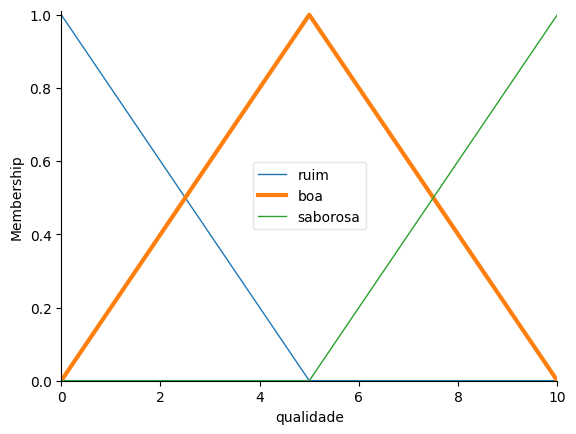

In [13]:
qualidade['boa'].view()

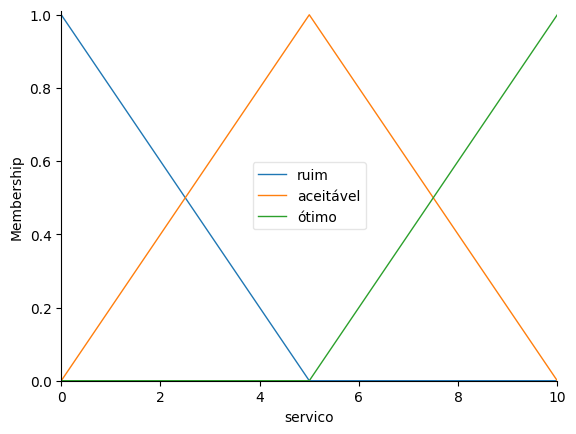

In [14]:
servico.view()

In [15]:
gorjeta.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [16]:
# função triangular
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 10])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [0, 10, 20])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [10, 20, 20])

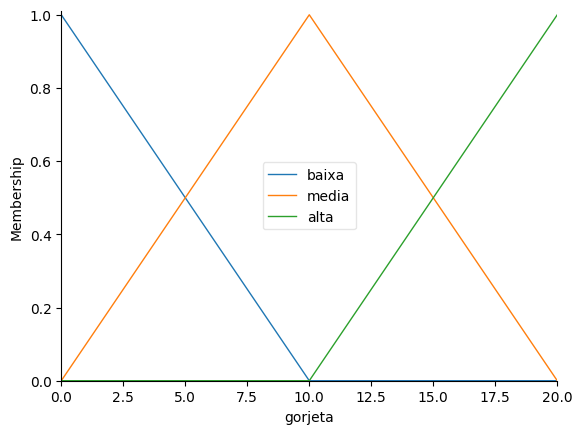

In [17]:
gorjeta.view()

In [18]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

## Sistema de controle

In [19]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [20]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [21]:
sistema.input['qualidade'] = 6.5
sistema.input['servico'] = 5.0
sistema.compute()

10.387559808612435


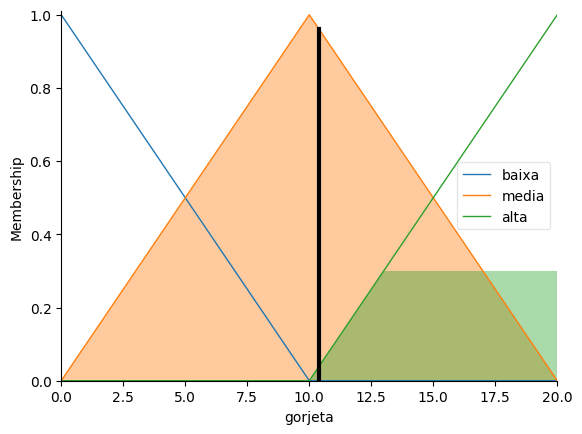

In [22]:
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)

# Outras funções

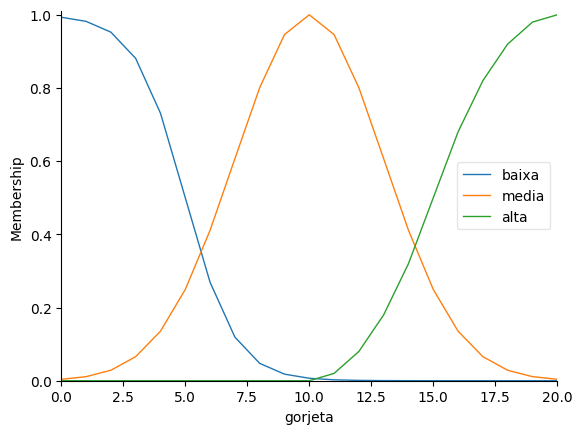

In [23]:
gorjeta['baixa'] = fuzz.sigmf(gorjeta.universe, 5, -1)
gorjeta['media'] = fuzz.gaussmf(gorjeta.universe, 10, 3)
gorjeta['alta'] = fuzz.pimf(gorjeta.universe, 10, 20, 20, 21)
gorjeta.view()

In [24]:
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

In [25]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [26]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [27]:
sistema.input['qualidade'] = 1
sistema.input['servico'] = 1
sistema.compute()

5.662380878042331


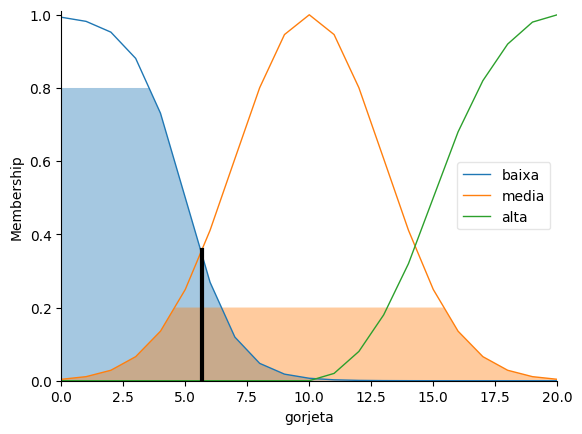

In [28]:
print(sistema.output['gorjeta'])
gorjeta.view(sim=sistema)